In [1]:
import numpy as np
from numpy import *
import scipy.stats as si
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    # --------- Insert your code here --------- #
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    c = (S0 * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))     #Call option
    p = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S0 * si.norm.cdf(-d1, 0.0, 1.0))   #Put option
  
    return c, p

In [4]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    
    paths = np.zeros((numSteps + 1, numPaths))        #Zero array for storing simulation data points
    dT = T / numSteps                                 #Time increments
    paths[0] = [S0] * numPaths                        #Define initial price for each path
    
    #Monte Carlo simulation of stock prices
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    #Calculation of call and put option prices
    CallPayoffT = np.maximum(paths[numSteps,:] - K, 0)
    PutPayoffT = np.maximum(K-paths[numSteps,:], 0)
    c = np.exp(-r * T)*np.mean(CallPayoffT)
    p = np.exp(-r * T)*np.mean(PutPayoffT)
    
    return c, p, paths

In [5]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))        #Zero array for storing simulation data points
    dT = T / numSteps                                 #Time increments
    paths[0] = [S0] * numPaths                        #Define initial price for each path
    
    #Monte Carlo simulation of stock prices
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    barrier_option = np.zeros(numPaths)
    
    for i in range(numPaths):
        index = np.array(np.where(paths[:,i] > Sb))    #Find the index of the stock price higher than barrier 
        if index.size:                                 #If the index array is not empty, barrier price has been hit
            barrier_option[i] = 1
        else:                                          #Else, the barrier price is not hit
            barrier_option[i] = 0
    
    #Calculation of call and put option prices
    CallPayoffT = barrier_option * (np.maximum(paths[numSteps,:] - K, 0))
    PutPayoffT = barrier_option * (np.maximum(K-paths[numSteps,:], 0))
    c = np.exp(-r * T)*np.mean(CallPayoffT)
    p = np.exp(-r * T)*np.mean(PutPayoffT)         
        
    return c, p

In [6]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations
np.random.seed(0)
numSteps = 12;      #1 year to maturity, 12 months
numPaths = 100000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, paths_1step = \
MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# # Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, paths_multistep = \
MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# # Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# # Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

# # Implement your one-step Monte Carlo pricing procedure for 10% increased volatility Barrier option
callMC_Barrier_Knockin_Price_1_step_in, putMC_Barrier_Knockin_Price_1_step_in = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, 1, numPaths)

# # Implement your multi-step Monte Carlo pricing procedure for 10% increased volatility Barrier option
callMC_Barrier_Knockin_Price_multi_step_in, putMC_Barrier_Knockin_Price_multi_step_in = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, numSteps, numPaths)

# # Implement your one-step Monte Carlo pricing procedure for 10% decreased volatility Barrier option
callMC_Barrier_Knockin_Price_1_step_de, putMC_Barrier_Knockin_Price_1_step_de = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, 1, numPaths)

# # Implement your multi-step Monte Carlo pricing procedure for 10% decreased volatility Barrier option
callMC_Barrier_Knockin_Price_multi_step_de, putMC_Barrier_Knockin_Price_multi_step_de = \
MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price), '\n')

print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step), '\n') 

print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step), '\n')

print('One-step MC price of an Barrier call option with 10% increased volatility is ' + str(callMC_Barrier_Knockin_Price_1_step_in)) 
print('One-step MC price of an Barrier put option with 10% increased volatility is ' + str(putMC_Barrier_Knockin_Price_1_step_in)) 
print('Multi-step MC price of an Barrier call option with 10% increased volatility is ' + str(callMC_Barrier_Knockin_Price_multi_step_in)) 
print('Multi-step MC price of an Barrier put option with 10% increased volatility is ' + str(putMC_Barrier_Knockin_Price_multi_step_in), '\n')

print('One-step MC price of an Barrier call option with 10% decreased volatility is ' + str(callMC_Barrier_Knockin_Price_1_step_de)) 
print('One-step MC price of an Barrier put option with 10% decreased volatility is ' + str(putMC_Barrier_Knockin_Price_1_step_de)) 
print('Multi-step MC price of an Barrier call option with 10% decreased volatility is ' + str(callMC_Barrier_Knockin_Price_multi_step_de)) 
print('Multi-step MC price of an Barrier put option with 10% decreased volatility is ' + str(putMC_Barrier_Knockin_Price_multi_step_de))


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455 

One-step MC price of an European call option is 7.998654777999737
One-step MC price of an European put option is 7.857752845908014
Multi-step MC price of an European call option is 8.052059005463658
Multi-step MC price of an European put option is 7.85781907349585 

One-step MC price of an Barrier call option is 7.814503100781505
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.912454787413431
Multi-step MC price of an Barrier put option is 1.2523736450466187 

One-step MC price of an Barrier call option with 10% increased volatility is 8.64225590894497
One-step MC price of an Barrier put option with 10% increased volatility is 0.0
Multi-step MC price of an Barrier call option with 10% increased volatility is 8.784808917542955
Multi-step MC price of an Barrier put option with 10% increased volatilit

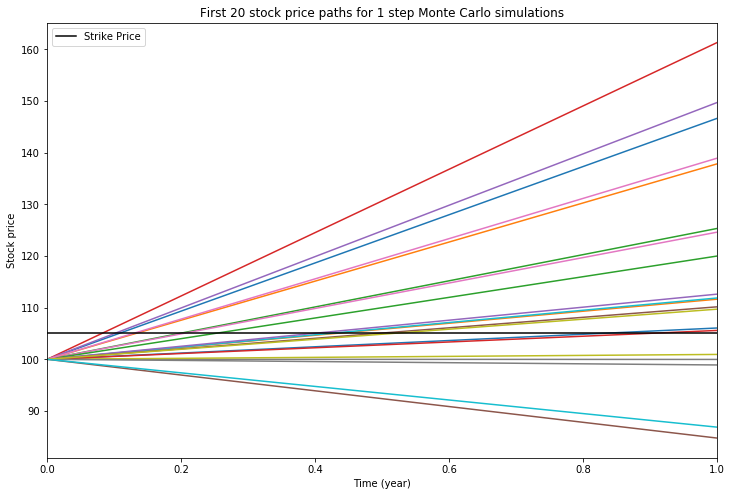

In [7]:
#Plot the 1 step Monte Carlo simulation

plt.figure(figsize=(12,8))
plt.plot(paths_1step[:,0:20])
plt.axhline(K, c="k", xmin=0,
            xmax=1,
           label="Strike Price")
plt.xlim([0, 1])
plt.ylabel("Stock price")
plt.xlabel("Time (year)")
plt.title("First 20 stock price paths for 1 step Monte Carlo simulations")
plt.legend(loc="best")
plt.show()

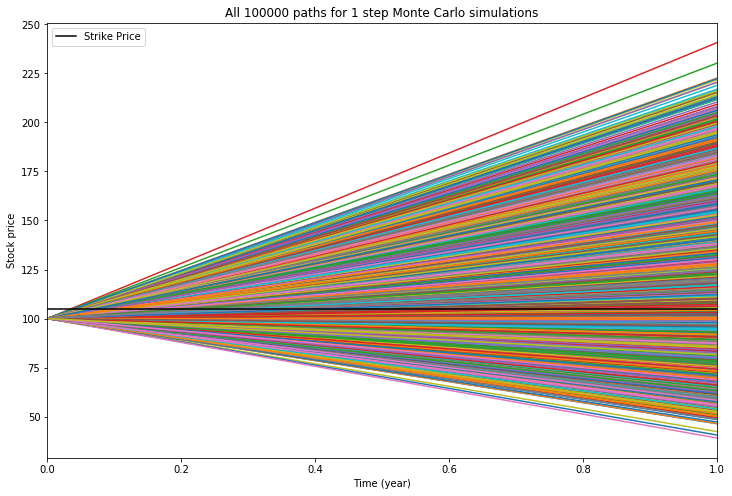

In [8]:
#Plot the 1 step Monte Carlo simulation

plt.figure(figsize=(12,8))
plt.plot(paths_1step[:,0:-1])
plt.axhline(K, c="k", xmin=0,
            xmax=1,
           label="Strike Price")
plt.xlim([0, 1])
plt.ylabel("Stock price")
plt.xlabel("Time (year)")
plt.title("All 100000 paths for 1 step Monte Carlo simulations")
plt.legend(loc="best")
plt.show()

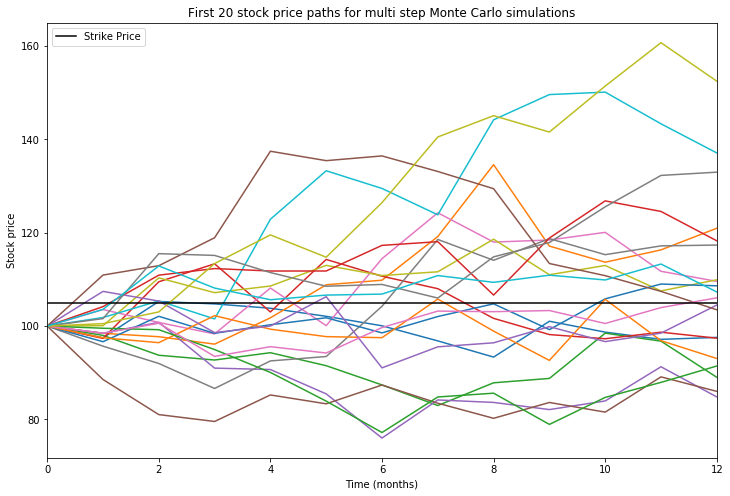

In [9]:
#Plot the multi step Monte Carlo simulation

plt.figure(figsize=(12,8))
plt.plot(paths_multistep[:,0:20])
plt.axhline(K, c="k", xmin=0,
            xmax=numSteps,
           label="Strike Price")
plt.xlim([0, numSteps])
plt.ylabel("Stock price")
plt.xlabel("Time (months)")
plt.title("First 20 stock price paths for multi step Monte Carlo simulations")
plt.legend(loc="best")
plt.show()

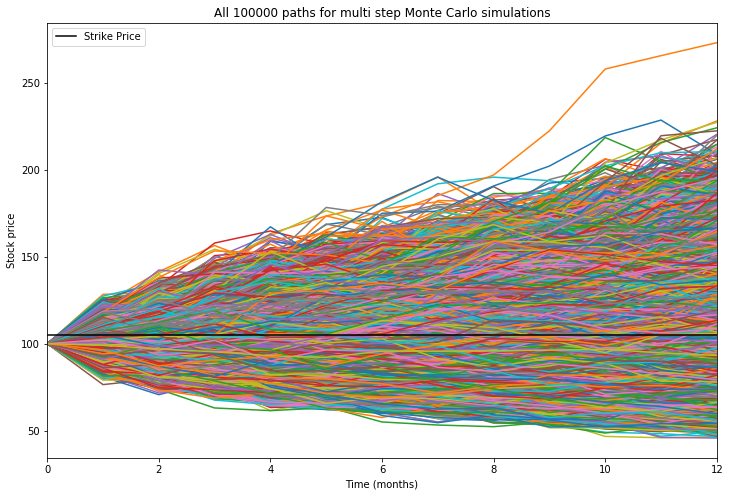

In [10]:
#Plot the multi step Monte Carlo simulation

plt.figure(figsize=(12,8))
plt.plot(paths_multistep[:,0:-1])
plt.axhline(K, c="k", xmin=0,
            xmax=numSteps,
           label="Strike Price")
plt.xlim([0, numSteps])
plt.ylabel("Stock price")
plt.xlabel("Time (months)")
plt.title("All 100000 paths for multi step Monte Carlo simulations")
plt.legend(loc="best")
plt.show()

In [11]:
## Part 3

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price), '\n')

# The number of time steps is chosen as 1 based on the following 2 reasons:
# 1. European options are path-independent thus number of time steps does not affect the estimation
# 2. number of time step of 1 requries much less coomputation thus the code is more efficient

num_steps_optimal = 1

# The number of paths is chosen based on the GridSearch

num_path_list = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000])

# residual variable initiation
residual_call_optimal = call_BS_European_Price    
residual_put_optimal = putBS_European_Price

for num_path in num_path_list:
    callMC_European_Price_1_step, putMC_European_Price_1_step, paths_1step = \
                                                  MC_european_price(S0, K, T, r, mu, sigma, 1, num_path)
    
    residual_call = abs(callMC_European_Price_1_step - call_BS_European_Price)
    if residual_call < residual_call_optimal:
        residual_call_optimal = residual_call
        num_path_call_optimal = num_path
        call_option_optimal = callMC_European_Price_1_step
    
    residual_put = abs(putMC_European_Price_1_step - putBS_European_Price)
    if residual_put < residual_put_optimal:
        residual_put_optimal = residual_put
        num_path_put_optimal = num_path
        put_option_optimal = putMC_European_Price_1_step


print('The optimal number of paths for call option is {}, the optimal estimation of call option price is {:.4f}'.format(num_path_call_optimal, call_option_optimal))
print('The absolute difference between estimation and Black-Scholes results is {:.5f}'.format(residual_call_optimal), '\n')

print('The optimal number of paths for put option is {}, the optimal estimation of put option price is {:.4f}'.format(num_path_put_optimal, put_option_optimal))
print('The absolute difference between estimation and Black-Scholes results is {:.5f}'.format(residual_put_optimal), '\n')

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455 

The optimal number of paths for call option is 10000000, the optimal estimation of call option price is 8.0214
The absolute difference between estimation and Black-Scholes results is 0.00006 

The optimal number of paths for put option is 10000000, the optimal estimation of put option price is 7.8959
The absolute difference between estimation and Black-Scholes results is 0.00459 

